In [ ]:
'''
Alejandro Fernández Trigo
'''

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 2 imágenes monobanda NIR y R de Landsat C (repositorio)
R = cv.imread('img/Landsat_C_04-11_R.png',cv.IMREAD_GRAYSCALE)
NIR = cv.imread('img/Landsat_C_05-11_NIR.png',cv.IMREAD_GRAYSCALE)

In [3]:
# Función ndvi
def ndvi(NIR, R):
    # Resultado original: matriz de ceros del tamaño de entrada:
    resultado = np.zeros((R.shape[0], R.shape[1]), np.uint8)
    
    for i in range(resultado.shape[0]):
        for j in range(resultado.shape[1]):
            # Calcular NDVI como el enunciado:
            r = float(R[i,j])
            nir = float(NIR[i,j])
            # Si el cociente es cero; pq en tal caso fallaría; metemos un 1
            if (nir + r) == 0:
                resultado[i,j] = 1
            else:
                # NDVI = NIR-R/NIR+R llevando los resultados al rango [1,255]
                resultado[i,j] = ((((nir - r) / (nir + r)) + 1) * 255/2)
    
    return resultado

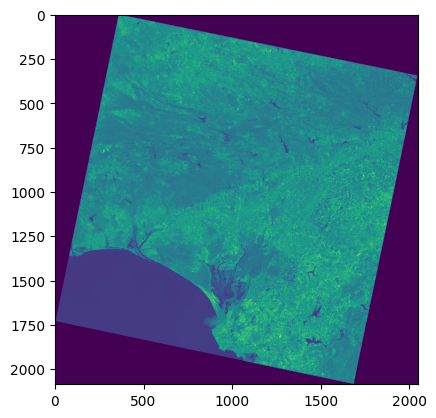

In [4]:
# Imagenes originales de entrada: comentar/descomentar ya que no se puede hacer más de un imshow en la misma casilla de un notebook!
plt.imshow(R)
plt.imshow(NIR)

True

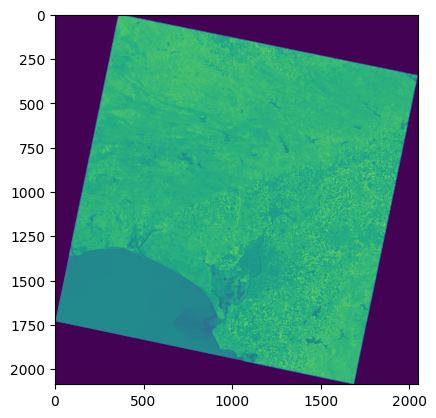

In [9]:
# Aplicar ndvi:
resultado = ndvi(NIR, R)
plt.imshow(resultado)
cv.imwrite("salida/3_NDVI.jpg", resultado)

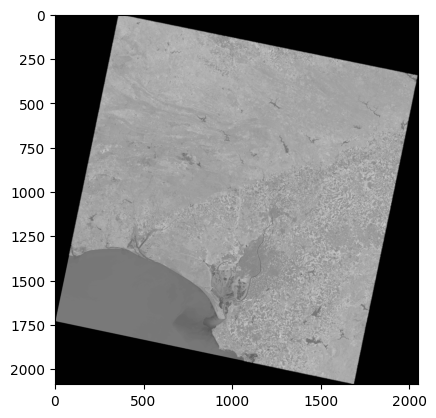

In [6]:
# Para verlo como el enunciado:
plt.imshow(resultado, cmap='gray')